In [65]:
from google.colab import drive
drive.mount('/content/drive/') 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# read csv file from drive
df = pd.read_csv("/content/drive/MyDrive/code_rush_project/bank.csv") 

In [68]:
# check last 5 datas from the dataset
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [70]:
# description about dataset
df.shape
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [71]:
# check number of unique values in each columns
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [72]:
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [73]:
# check if there is any empty data
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Take-away : there is no missing value in the dataset

In [74]:

for col in df.select_dtypes(include='object').columns:
  print(f'{col.upper()} : {df[col].unique()}')
  print("\n")

JOB : ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']


MARITAL : ['married' 'single' 'divorced']


EDUCATION : ['secondary' 'tertiary' 'primary' 'unknown']


DEFAULT : ['no' 'yes']


HOUSING : ['yes' 'no']


LOAN : ['no' 'yes']


CONTACT : ['unknown' 'cellular' 'telephone']


MONTH : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


POUTCOME : ['unknown' 'other' 'failure' 'success']


DEPOSIT : ['yes' 'no']




In [75]:
df.groupby('deposit').mean()


,age,balance,day,duration,campaign,pdays,previous
deposit,,,,,,,
no,40.837391,1280.227141,16.108122,223.130257,2.839264,35.685340,0.528350
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [76]:
# making an array of categorical columns
categorical_columns = []
for col in df.select_dtypes(include="object").columns:
  categorical_columns.append(col)
print(categorical_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


In [77]:
# making an array of continuous data
continuous_columns = []
for col in df.select_dtypes(include="int64").columns:
  continuous_columns.append(col)
print(continuous_columns)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [78]:
list(enumerate(categorical_columns))

[(0, 'job'),
 (1, 'marital'),
 (2, 'education'),
 (3, 'default'),
 (4, 'housing'),
 (5, 'loan'),
 (6, 'contact'),
 (7, 'month'),
 (8, 'poutcome'),
 (9, 'deposit')]

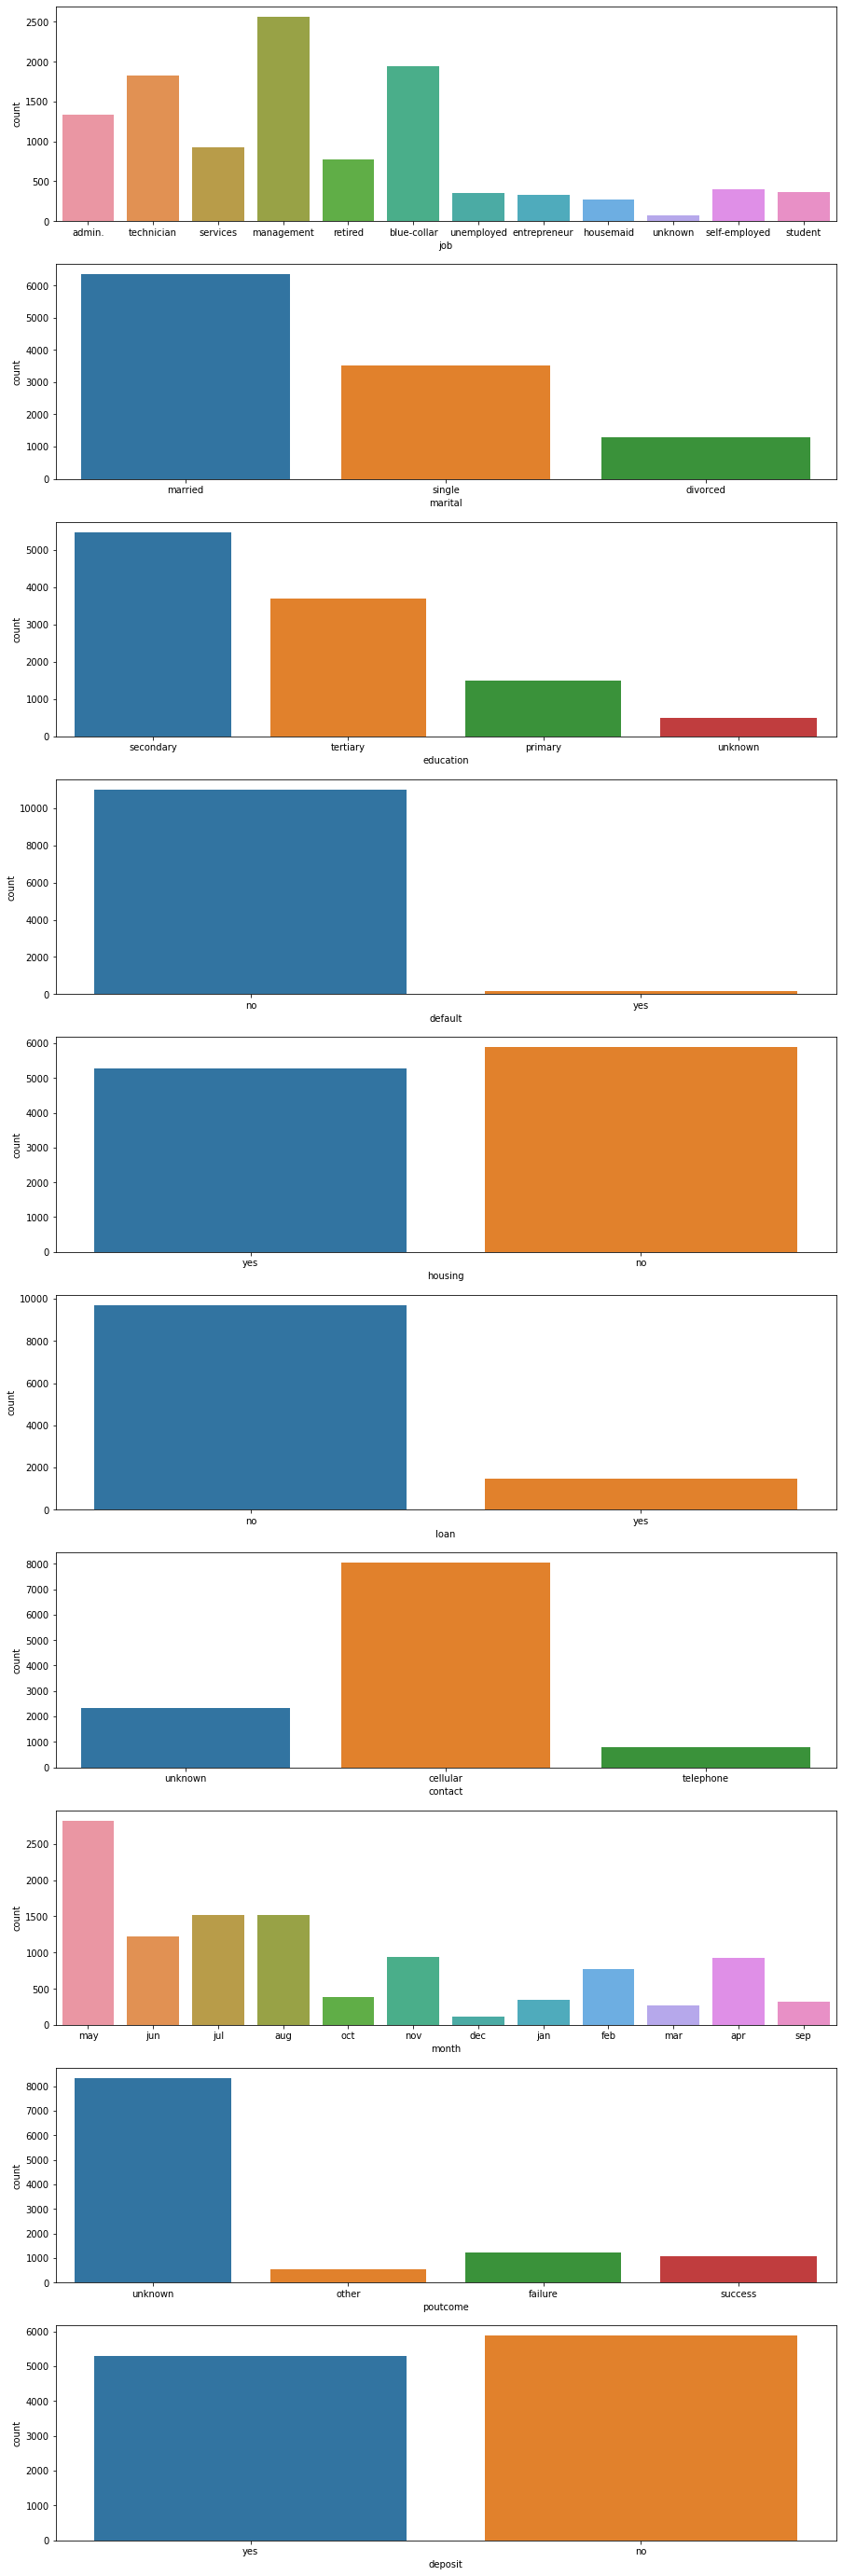

In [79]:
# Displaying the count of unique values of categorical columns
index =1
plt.figure(figsize=(15,50))
for i in categorical_columns:
  plt.subplot(10,1,index)
  sns.countplot(x=i,data=df)
  index = index+1




Take-away:

* client with job type as management records are high in given dataset and housemaid are very less
* client who married are high in records in given dataset and divorced are less
* client whoes education background is secondary are in high numbers in given dataset
* defualt feature seems not to play important role as it has value of no at high ratio to value yes which can drop
* data in month of may is high and less in dec


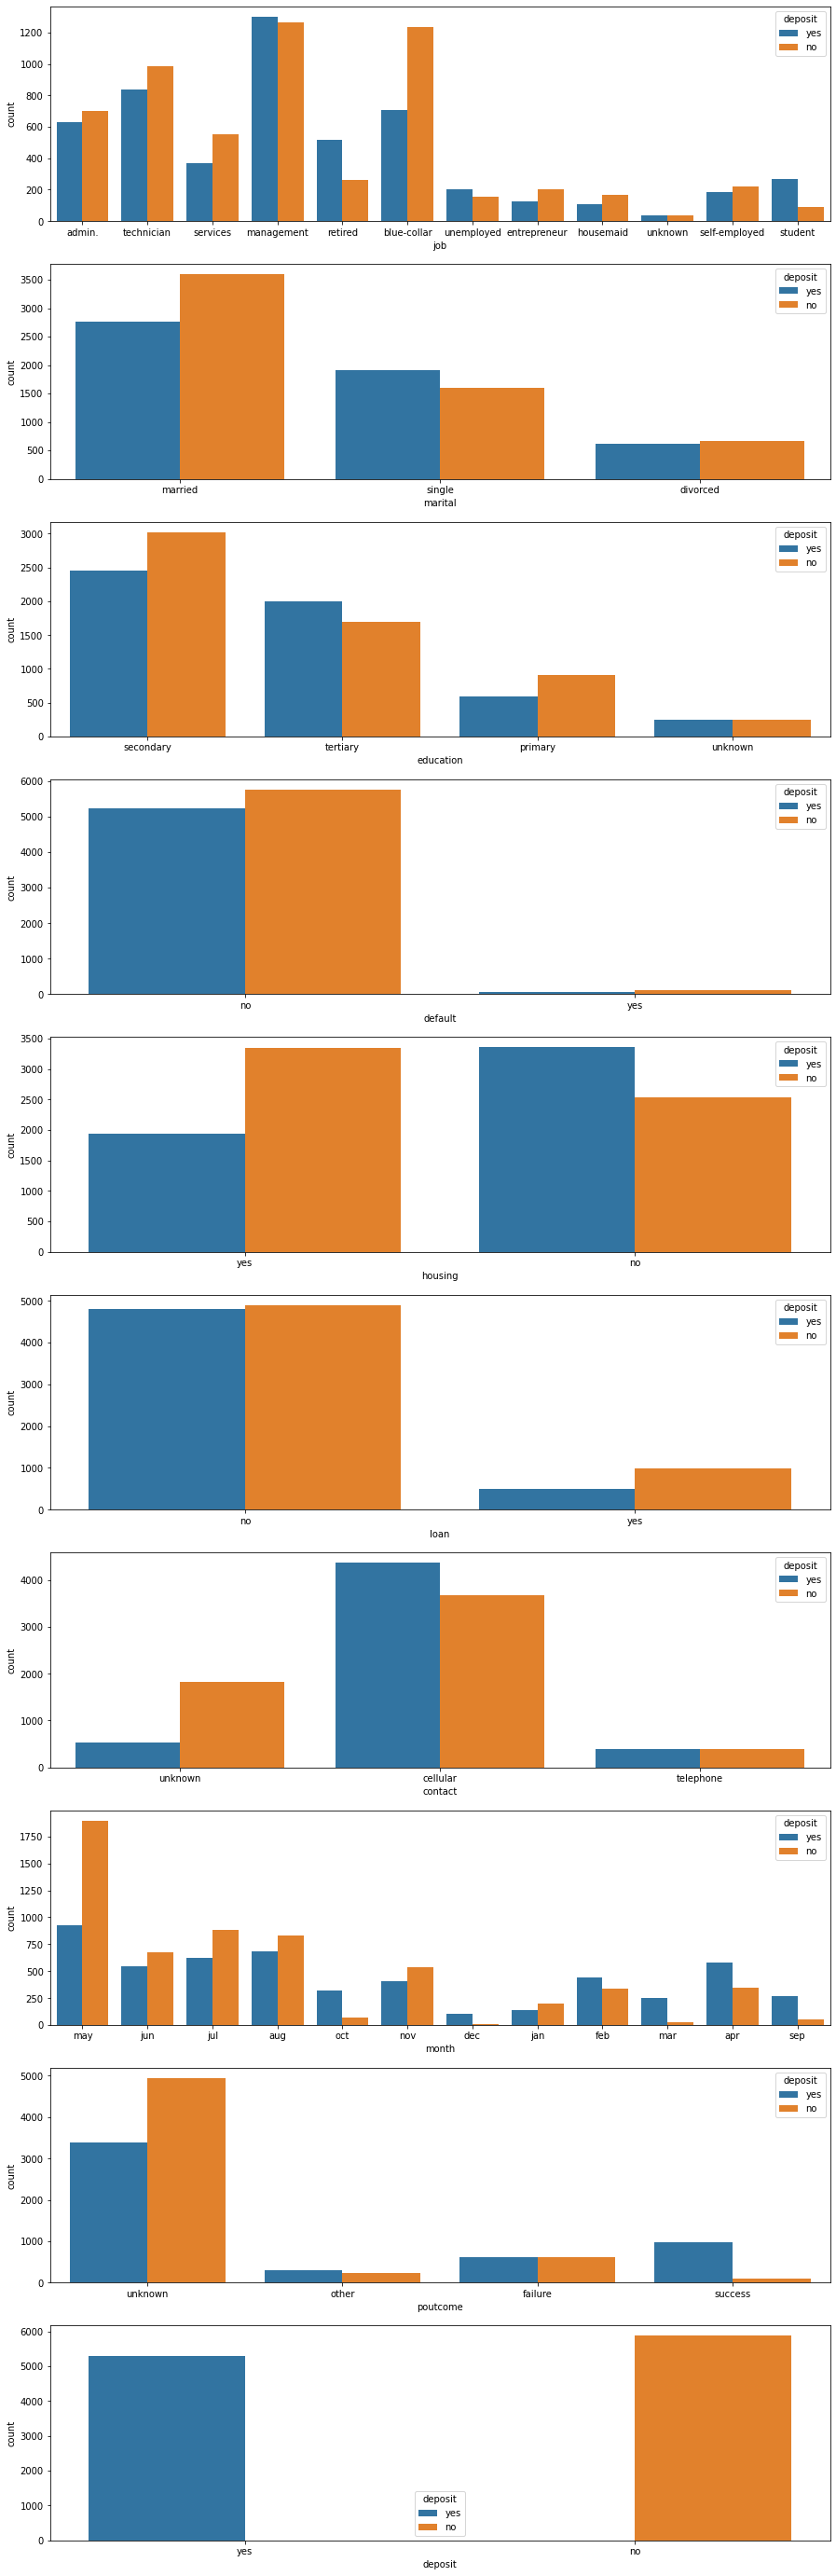

In [80]:
index =1
plt.figure(figsize=(15,50))
for i in categorical_columns:
  plt.subplot(10,1,index)
  sns.countplot(x=i,data=df,hue="deposit")
  index = index+1




Take-away:
* single person is more likely to subscribed for deposit as compared to married one.
* people with no housing loan are more likely to subscribed the term deposit
* cellular contact has more chances that person will subscribed the term deposit while unknown has very very less
* In month of may the most of call was done(around 2500), while in Dec month this was very very less(below 200)
* students and retired people has more likely to subscribed the term deposit


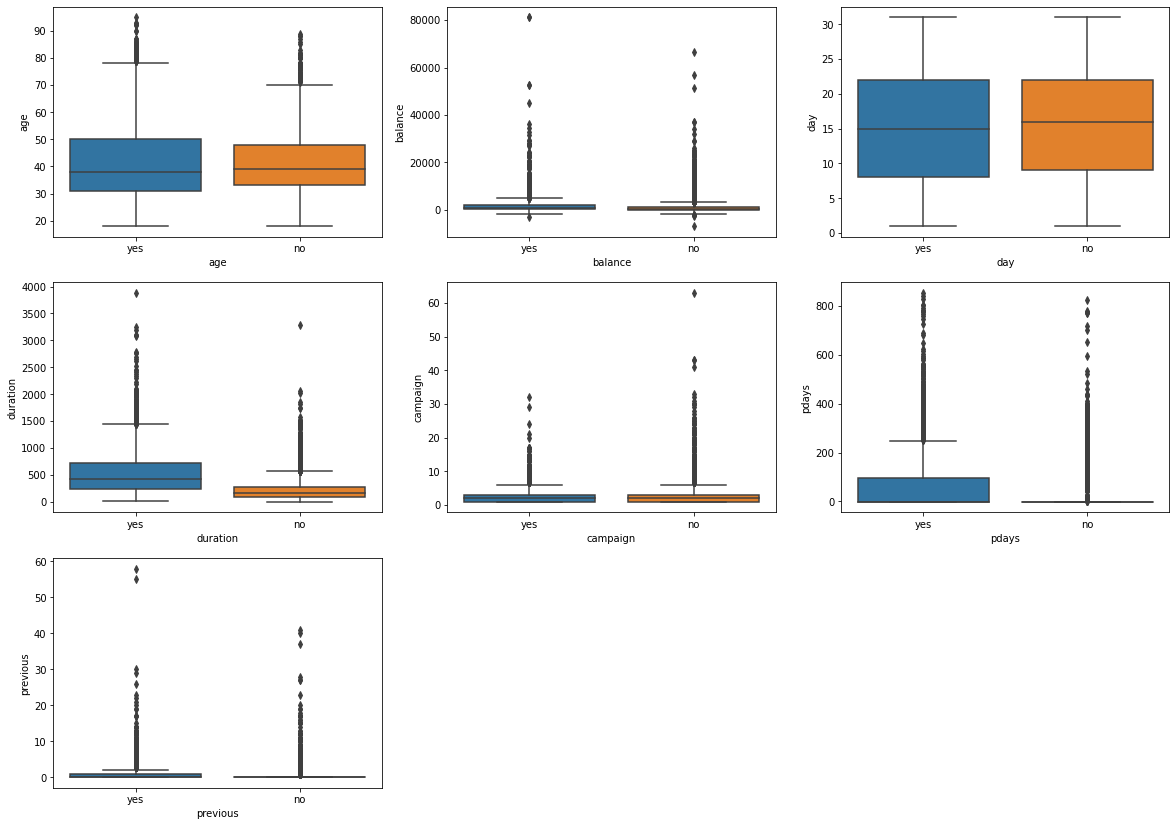

In [81]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_columns:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="deposit", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

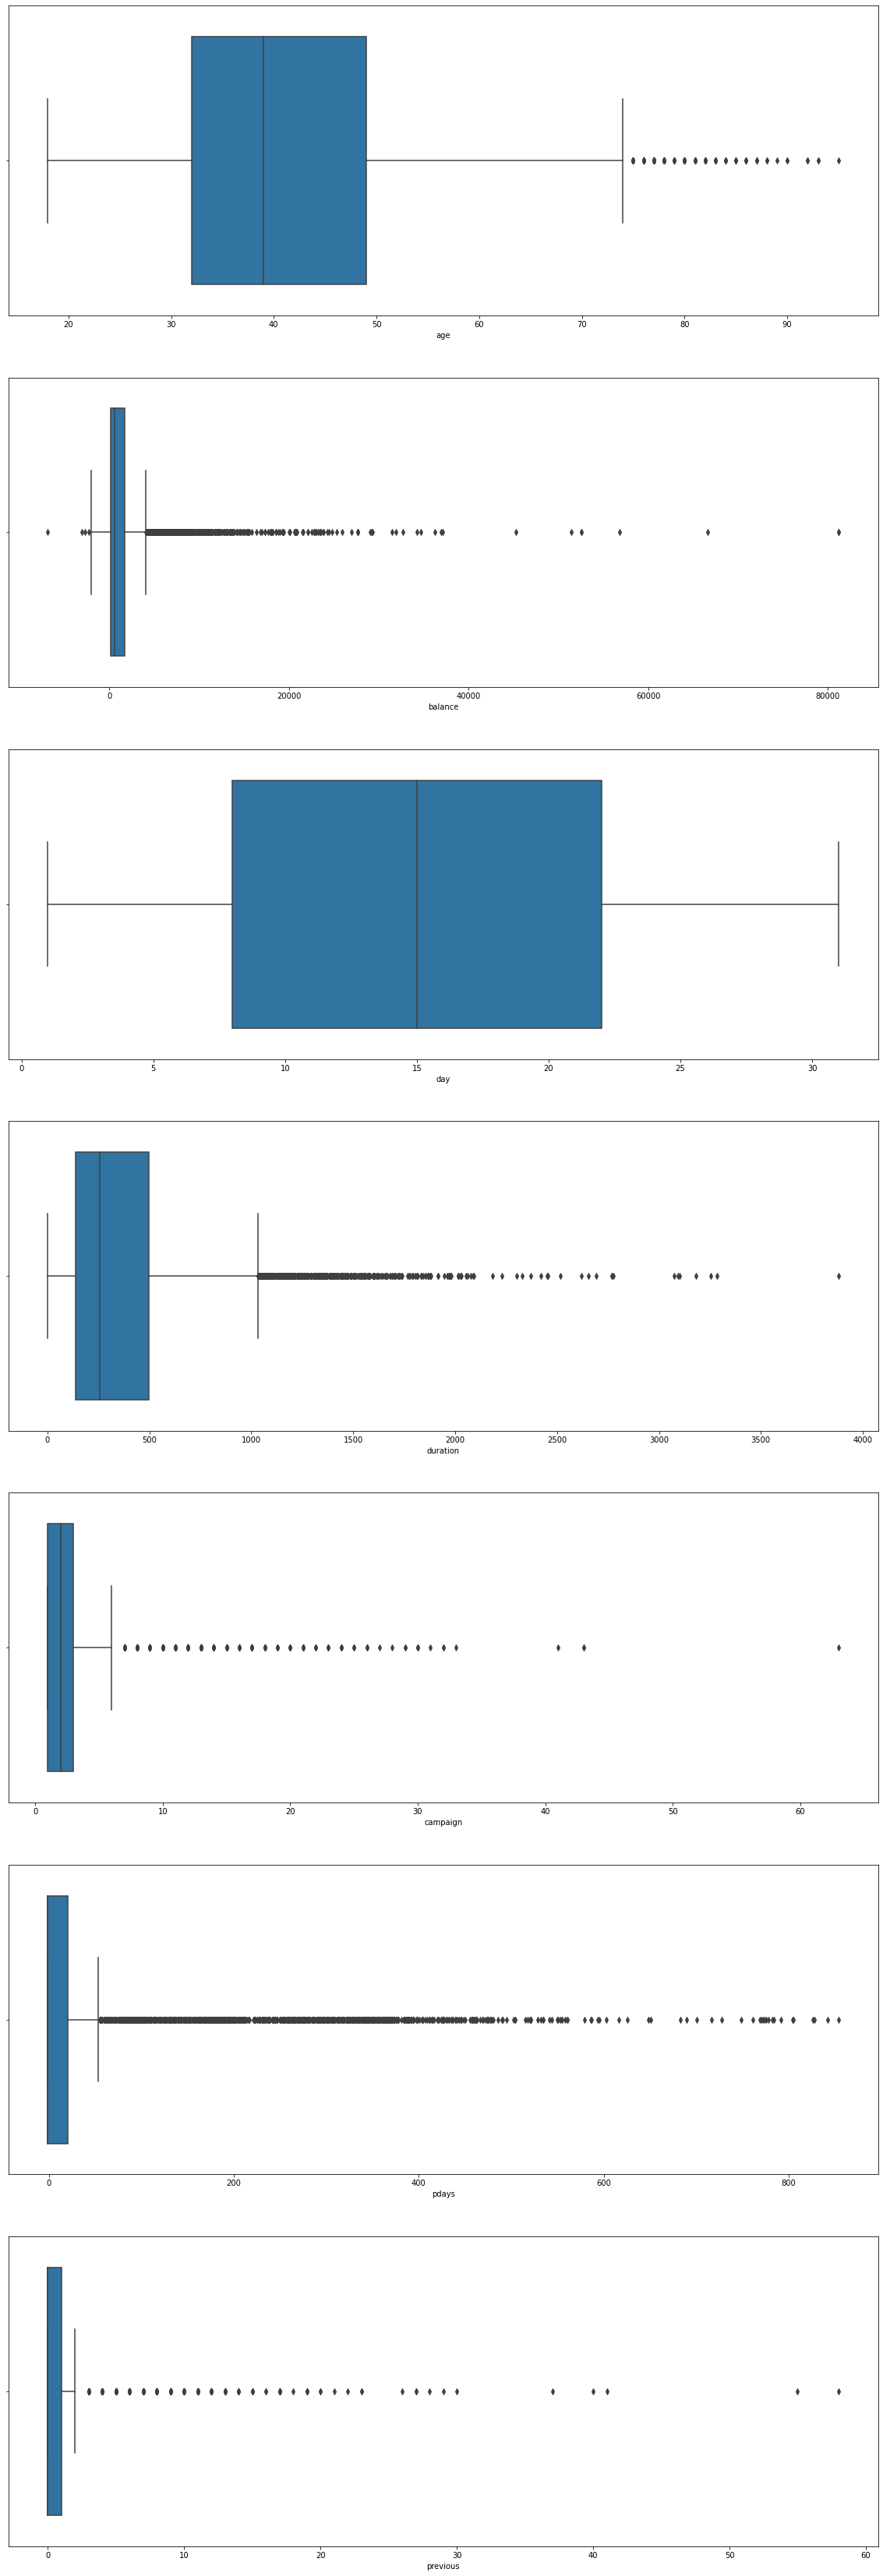

In [82]:
# boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in continuous_columns:
    ax = plt.subplot(7,1,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()


age, balance, duration, compaign, pdays and previous has some outliers

In [83]:
outliers=[]
def detect_outliers(data):
  threshold=3
  mean = np.mean(data)
  std = np.std(data)

  for i in data:
    z_score = (i - mean) / std
    if np.abs(z_score) > threshold:
      outliers.append(i)
  return outliers

In [84]:
outliers_age = detect_outliers(df.age)
min(outliers_age)

77

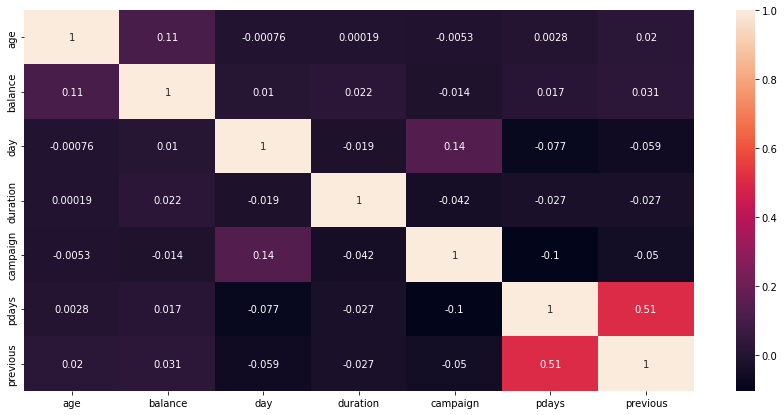

In [85]:
## Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

Take-away:
There seems to be not much correlation between the datasets

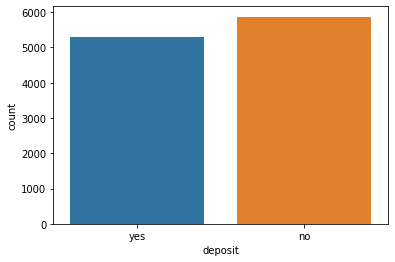

In [86]:
#check if the dataset is balanced or not
sns.countplot(x='deposit',data=df)
plt.show()


Take-away: The dataset is balanced

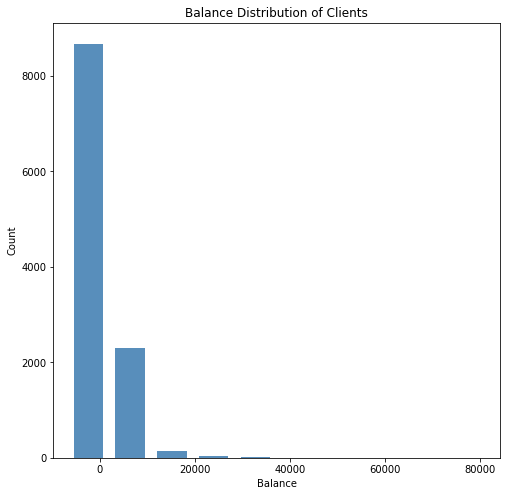

The following values represent the number of data points between each bin:
[8673 2296  136   37   12    1    3    1    1    2]


In [87]:
# Plotting a histogram to show distribution
fig = plt.figure(figsize = (8,8))
plt.hist(df['balance'], bins=10, color='steelblue', alpha=0.9, rwidth=0.7)
plt.title ('Balance Distribution of Clients')
plt.xlabel('Balance') 
plt.ylabel('Count')
plt.show()

print('The following values represent the number of data points between each bin:')

counts, bin_edges = np.histogram(df['balance'], bins=10)
print(counts)


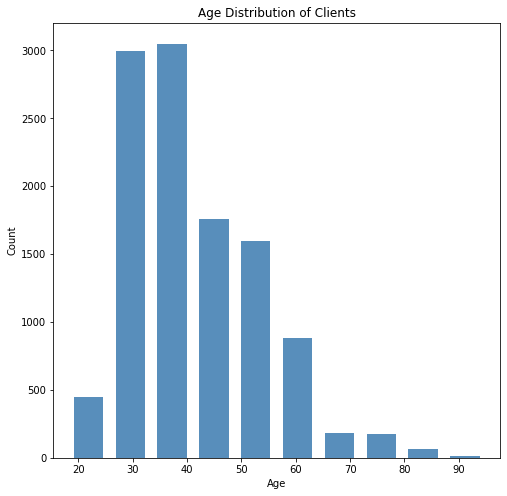

The following values represent the number of data points between each bin:
[8673 2296  136   37   12    1    3    1    1    2]


In [88]:
# Plotting a histogram to show distribution
fig = plt.figure(figsize = (8,8))
plt.hist(df['age'], bins=10, color='steelblue', alpha=0.9, rwidth=0.7)
plt.title ('Age Distribution of Clients')
plt.xlabel('Age') 
plt.ylabel('Count')
plt.show()

print('The following values represent the number of data points between each bin:')

counts, bin_edges = np.histogram(df['balance'], bins=10)
print(counts)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


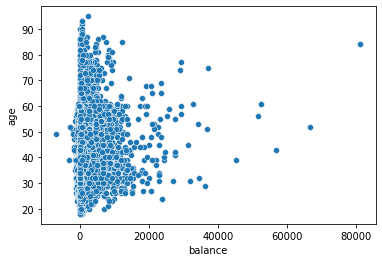

In [89]:
sns.scatterplot(df.balance,df.age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


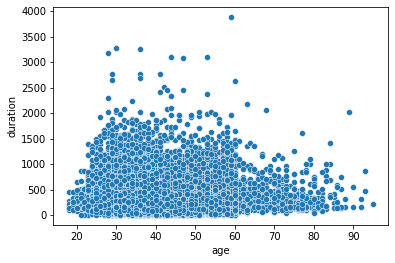

In [90]:
sns.scatterplot(df.age,df.duration)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


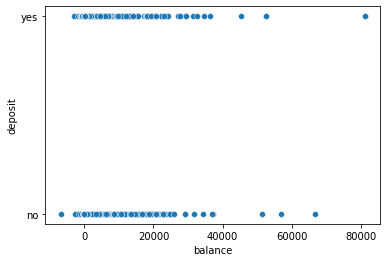

In [126]:
sns.scatterplot(df.balance,df.deposit)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


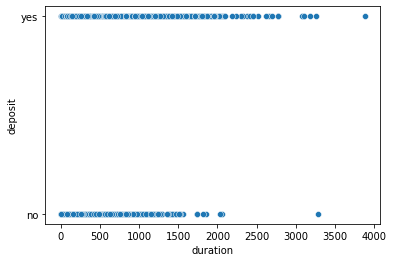

In [91]:
sns.scatterplot(df.duration,df.deposit)

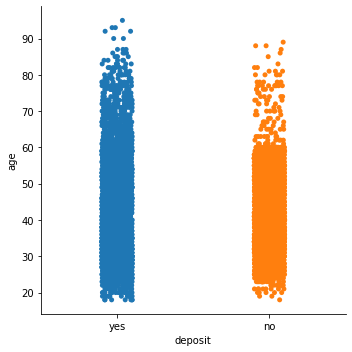

In [127]:
sns.catplot(data=df,x='deposit',y='age')


# Data Pre-processing

In [92]:
# for feature engineering
# make a copy of original dataset
df2=df.copy()
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [93]:
# df2.groupby(['deposit','balance'],sort=True)['balance'].count()
len(df2.balance)

11162

In [94]:
df2.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [95]:
df2['month'].value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

In [96]:
df2['day'].value_counts()

20    570
18    548
30    478
5     477
15    466
14    463
13    453
21    452
6     447
12    445
8     419
17    411
28    410
4     402
29    388
19    384
7     382
11    373
16    369
9     364
2     334
3     306
27    284
22    269
26    252
23    245
25    224
10    163
31    140
24    122
1     122
Name: day, dtype: int64

### Handling Outliers

In [97]:
# There are some records with negative balance and very high balace which acts as major outliers
# So we will drop this

df2.drop(df2[(df2['balance']>40000) | (df2['balance']<0)].index,inplace=True,axis=0)


In [98]:
# Drop records with duration above 3000 which acts as major outliers¶

df2.drop(df2[df2['duration']>3000].index,inplace=True,axis=0)


In [99]:
# Drop major outliers of compaign column¶

df2.drop(df2[df2['campaign']>30].index,axis=0,inplace=True)


In [100]:
# Drop outliers in previous features¶

df2.drop(df2[df2['previous']>30].index,axis=0,inplace=True)


In [101]:
# As seen above pdays -1 means these peoples are new or involving 1st time in campaign and they have no previous contact so previous ==0 and poutcomes is unknown for all -1 values of pdays we will drop pdays columns
df2 = df2.drop('pdays', axis=1)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,0,unknown,yes


### Changing four categorical columns into numerical columns which have binary values.



In [102]:
# default column
 
def default_to_num(df2):
    if df2['default'] == 'no':
        return 0
    elif df2['default'] == 'yes':
        return 1
    else:
        return 99
df2['default'] = df2.apply(default_to_num, axis=1)
df2['default'].value_counts()




0    10359
1       90
Name: default, dtype: int64

In [103]:

# housing column

def housing_to_num(df2):
    if df2['housing'] == 'no':
        return 0
    if df2['housing'] == 'yes':
        return 1
    else:
        return 99
df2['housing'] = df2.apply(housing_to_num, axis=1)
df2['housing'].value_counts()

0    5691
1    4758
Name: housing, dtype: int64

In [104]:
# loan column

def loan_to_num(df2):
    if df2['loan'] == 'no':
        return 0
    if df2['loan'] == 'yes':
        return 1
    else:
        return 99
df2['loan'] = df2.apply(loan_to_num, axis=1)
df2['loan'].value_counts()


0    9215
1    1234
Name: loan, dtype: int64

In [105]:
# deposit column

def deposit_to_num(df2):
    if df2['deposit'] == 'no':
        return 0
    if df2['deposit'] == 'yes':
        return 1
    else:
        return 99
df2['deposit'] = df2.apply(deposit_to_num, axis=1)
df2['deposit'].value_counts()


0    5382
1    5067
Name: deposit, dtype: int64

In [106]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,0,unknown,1


In [107]:
df2["education"].value_counts()

secondary    5067
tertiary     3535
primary      1369
unknown       478
Name: education, dtype: int64

In [108]:
# drop rows which has unknown education
unknownEducation = df2[ (df2['education'] == 'unknown')].index
df2.drop(unknownEducation , inplace=True)


In [109]:
df2["education"].value_counts()

secondary    5067
tertiary     3535
primary      1369
Name: education, dtype: int64

In [110]:
df2["job"].value_counts()

management       2373
technician       1663
blue-collar      1646
admin.           1203
services          803
retired           709
self-employed     373
unemployed        336
student           292
entrepreneur      286
housemaid         256
unknown            31
Name: job, dtype: int64

In [111]:
# drop rows which has unknown jobs
unknownJob = df2[ (df2['job'] == 'unknown')].index
df2.drop(unknownJob , inplace=True)
df2["job"].value_counts()

management       2373
technician       1663
blue-collar      1646
admin.           1203
services          803
retired           709
self-employed     373
unemployed        336
student           292
entrepreneur      286
housemaid         256
Name: job, dtype: int64

In [112]:
df2["contact"].value_counts()

cellular     7260
unknown      2007
telephone     673
Name: contact, dtype: int64

In [113]:
df2["poutcome"].value_counts()

unknown    7338
failure    1119
success     994
other       489
Name: poutcome, dtype: int64

In [114]:
# one hot encoding for nominal categorical data
df2 = pd.get_dummies(df2,columns=['job','marital','contact','education','poutcome'],drop_first=True)

In [115]:
# ordinal encoding for ordinal categorical data
df2["month"].value_counts()


may    2414
aug    1401
jul    1277
jun    1093
nov     882
apr     845
feb     711
oct     358
jan     303
sep     294
mar     261
dec     101
Name: month, dtype: int64

In [116]:
month_map = {
    'jan':1,
    'feb':2,
    'mar':3,
    'apr':4,
    'may':5,
    'jun':6,
    'jul':7,
    'aug':8,
    'sep':9,
    'oct':10,
    'nov':11,
    'dec':12
}
df2['month_ordinal'] = df2.month.map(month_map)
df2.head()

,age,default,balance,housing,loan,day,month,duration,campaign,previous,...,marital_married,marital_single,contact_telephone,contact_unknown,education_secondary,education_tertiary,poutcome_other,poutcome_success,poutcome_unknown,month_ordinal
0,59,0,2343,1,0,5,may,1042,1,0,...,1,0,0,1,1,0,0,0,1,5
1,56,0,45,0,0,5,may,1467,1,0,...,1,0,0,1,1,0,0,0,1,5
2,41,0,1270,1,0,5,may,1389,1,0,...,1,0,0,1,1,0,0,0,1,5
3,55,0,2476,1,0,5,may,579,1,0,...,1,0,0,1,1,0,0,0,1,5
4,54,0,184,0,0,5,may,673,2,0,...,1,0,0,1,0,1,0,0,1,5


In [117]:
df2["month_ordinal"].value_counts()


5     2414
8     1401
7     1277
6     1093
11     882
4      845
2      711
10     358
1      303
9      294
3      261
12     101
Name: month_ordinal, dtype: int64

In [118]:
df2 = df2.drop('month', axis=1)
df2.head()

,age,default,balance,housing,loan,day,duration,campaign,previous,deposit,...,marital_married,marital_single,contact_telephone,contact_unknown,education_secondary,education_tertiary,poutcome_other,poutcome_success,poutcome_unknown,month_ordinal
0,59,0,2343,1,0,5,1042,1,0,1,...,1,0,0,1,1,0,0,0,1,5
1,56,0,45,0,0,5,1467,1,0,1,...,1,0,0,1,1,0,0,0,1,5
2,41,0,1270,1,0,5,1389,1,0,1,...,1,0,0,1,1,0,0,0,1,5
3,55,0,2476,1,0,5,579,1,0,1,...,1,0,0,1,1,0,0,0,1,5
4,54,0,184,0,0,5,673,2,0,1,...,1,0,0,1,0,1,0,0,1,5


In [119]:
# drop default column as it has very high number of no to the number of yes 
df2 = df2.drop('default', axis=1)
df2.head()

,age,balance,housing,loan,day,duration,campaign,previous,deposit,job_blue-collar,...,marital_married,marital_single,contact_telephone,contact_unknown,education_secondary,education_tertiary,poutcome_other,poutcome_success,poutcome_unknown,month_ordinal
0,59,2343,1,0,5,1042,1,0,1,0,...,1,0,0,1,1,0,0,0,1,5
1,56,45,0,0,5,1467,1,0,1,0,...,1,0,0,1,1,0,0,0,1,5
2,41,1270,1,0,5,1389,1,0,1,0,...,1,0,0,1,1,0,0,0,1,5
3,55,2476,1,0,5,579,1,0,1,0,...,1,0,0,1,1,0,0,0,1,5
4,54,184,0,0,5,673,2,0,1,0,...,1,0,0,1,0,1,0,0,1,5


## Model work

In [120]:
X = df2.drop(columns='deposit',axis=1)
y = df2.deposit


In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)



In [122]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)


In [123]:
from sklearn.linear_model import LogisticRegression #logistic regression
import sklearn.metrics as metrics
lr= LogisticRegression()

lr.fit(X_train_s,y_train)
Y_pred_lr = lr.predict(X_test_s)

print("Testing Accuracy of LogisticRegression : ",metrics.accuracy_score(y_test,Y_pred_lr))
#print("Accuracy of LogisticRegression",pipe_lr.score(X_test,Y_test))

print("Training Accuracy of LogisticRegression : ",lr.score(X_train_s,y_train))

Testing Accuracy of LogisticRegression :  0.789738430583501
Training Accuracy of LogisticRegression :  0.8072183098591549


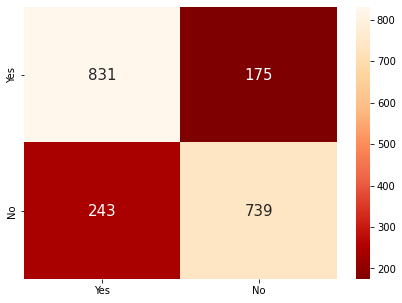

In [124]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,Y_pred_lr),annot=True,cmap="OrRd_r",
            fmt="d",cbar=True,xticklabels=['Yes','No'],yticklabels=['Yes','No'],
            annot_kws={"fontsize":15})
plt.show()

In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred_lr))


              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1006
           1       0.81      0.75      0.78       982

    accuracy                           0.79      1988
   macro avg       0.79      0.79      0.79      1988
weighted avg       0.79      0.79      0.79      1988

